Please **submit this Jupyter notebook through Canvas** no later than **Monday November 5 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Tharangni H Sivaji (11611065)

-----
# Exercise 1
Let $P_k$ be the $k$th _Legendre polynomial_ (see paragraph 7.3.4) on $[-1, 1]$.

We know that $P_0(x) = 1$, $P_1(x) = x$, and that $P_k$ satisfy the recurrence relation 

$$k P_k(x) =x (2k-1)  P_{k-1}(x) - (k-1) P_{k-2}(x).$$

We will use [_induction_](https://en.wikipedia.org/wiki/Mathematical_induction) to show that the derivatives of the Legendre polynomials satisfy

$$P_k'(1) = k(k+1)/2.$$

## (a) Base case
Show that $P_0'(1) = 0$ and $P_1'(1) = 1$.

At k = 0,

$$
P_0(x) = 1 \hspace{3em}\text{(given)} \\
\text{differentiate w.r.t } x \text{ and }x = 1 \\
P_0'(1) = 0 \\
% \Rightarrow P_0'(1) = 0(0+1)/2 = 0(0.5) = 0 \\
$$

At k = 1,

$$
1 \cdot P_1(x) =x (2(1)-1)  P_{1-1}(x) - (1-1) P_{1-2}(x) \\
\rightarrow P_1(x) = x (1) P_0(x) \\
\text{differentiate w.r.t } x \text{ and } x = 1\\
\rightarrow P_1'(1) = 1 (1) (1) \\
\Rightarrow P_1'(1) = 1 \\
% P_1'(1) = 1(1+1)/2 = 1(1) = 1
$$

Hence the base cases are proved


## (b)  Induction Step
Let $k \geq 2$. Use the recurrence relation to show that $P_k'(1) = k(k+1)/2$.

Pg 322

Assume, $P_k(x)$ is true for k = n. 

$$ \Rightarrow nP_n(x) = x (2n-1)  P_{n-1}(x) - (n-1) P_{n-2}(x) \hspace{2em}\text{is true}$$

We will prove by induction that k = n+1 also satisfies the relation for its derivative.

At k = n+1

$$ 
\Rightarrow P_{n+1}(x) = x (2(n+1)-1)  P_{n}(x) - (n) P_{n-1}(x) \\
P_{n+1}(x) = x (2n+1)  P_{n}(x) - (n) P_{n-1}(x) \\
$$


This result is validated by statement (1).

Hence  $P_k'(1) = k(k+1)/2$ is proved.

----------------

# Exercise 2

A bacterial population $P$ grows according to the goemetric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from prettytable import PrettyTable
plt.rcParams["figure.figsize"] = (16, 10)

In [23]:
data = [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14]

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$.

In [24]:
def f(t, x):
    '''
    t: vector of time points
    x: x vector
    '''
#     return x[0]*np.exp(x[1]*t)
    return x[0] * x[1] ** t

def log_f(t, x):
    '''
    t: vector of time points
    x: x vector
    '''
    return t*np.log(x[0]) + t*np.log(x[1])

In [25]:
def r(y, f, t, x):
    '''
    y : true data points
    f : pass the true function or log function
    Computes residual
    '''
    return y - f(t, x)

def J(t, x, log = 0):
    '''
    Jacobian of the residual
    log: T/F : boolean
    '''
    J = np.zeros((len(t), 2))

    for i in range(J.shape[0]):
        
        if log:
            J[i][0] = -1*(t[i]/x[0] + t[i]*np.log(x[1]))            
            J[i][1] = -1*(t[i]/x[1] + t[i]*np.log(x[0]))
        else:
            J[i][0] = -x[1]**t[i]            
            J[i][1] = -t[i]*x[0]*x[1]**(t[i]-1)

#         J[i][0] = -np.exp(x[1]*t[i])
#         J[i][1] = -t[i]*x[0]*np.exp(x[1]*t[i])
        
    return J

In [26]:
def gauss_newton(data, f, time, x_init, max_iter, log = 0):
    '''
    data : given y
    f : f or log_f function to pass
    time : time taken 
    x_init : starting vector (2 x 1)
    log: T/F : boolean
    
    Returns: datapoints as [P0, r]
    '''
    
    k = 0    
    ans = []
    e_mach = 2**-52
    
    print("Gauss Newton sequence of iterations: \n")
    t = PrettyTable(['k', 'x.T', 'r2'])
    
#     while(x_init[0]>2**-52 or x_init[1] > 2**-52 and k < max_iter):
    while(k < max_iter):
        
        ans.append(x_init)
        
        res = r(data, f, time, x_init)
        r2 = np.linalg.norm(res, 2) ** 2
        
        t.add_row([k, x_init, r2])
        
        Jx = J(time, x_init, log)
        s = np.linalg.lstsq(Jx, -res, rcond=None)[0]        
        
        x1 = x_init + s
        
        x_init = x1
        k = k + 1
    
    print(t)
    return np.array(ans)

In [27]:
# data = np.array([2.0, 0.7, 0.3, 0.1])

In [28]:
x_init = np.array([0.4, 1.2], dtype = float)
ti = np.array([i for i in range(len(data))], dtype = float)
max_iter = 8

In [29]:
ans = gauss_newton(data, f, ti, x_init, max_iter, 0)

Gauss Newton sequence of iterations: 

+---+---------------------------+--------------------+
| k |            x.T            |         r2         |
+---+---------------------------+--------------------+
| 0 |         [0.4 1.2]         | 228.25202823618318 |
| 1 | [-0.96134851  3.15798594] | 10182672.687918615 |
| 2 |  [0.03714165 3.17333383]  | 12232.196467151982 |
| 3 |  [0.03624662 2.78326461]  | 1154.4251272821803 |
| 4 |  [0.06860529 2.14871557]  | 7.3995110542311995 |
| 5 |  [0.19573204 1.57011574]  | 129.35006731450204 |
| 6 |  [0.20113261 2.02973361]  | 248.53871930214717 |
| 7 |  [0.2310192  1.83975836]  | 6.446945343604023  |
+---+---------------------------+--------------------+


In [30]:
ans

array([[ 0.4       ,  1.2       ],
       [-0.96134851,  3.15798594],
       [ 0.03714165,  3.17333383],
       [ 0.03624662,  2.78326461],
       [ 0.06860529,  2.14871557],
       [ 0.19573204,  1.57011574],
       [ 0.20113261,  2.02973361],
       [ 0.2310192 ,  1.83975836]])

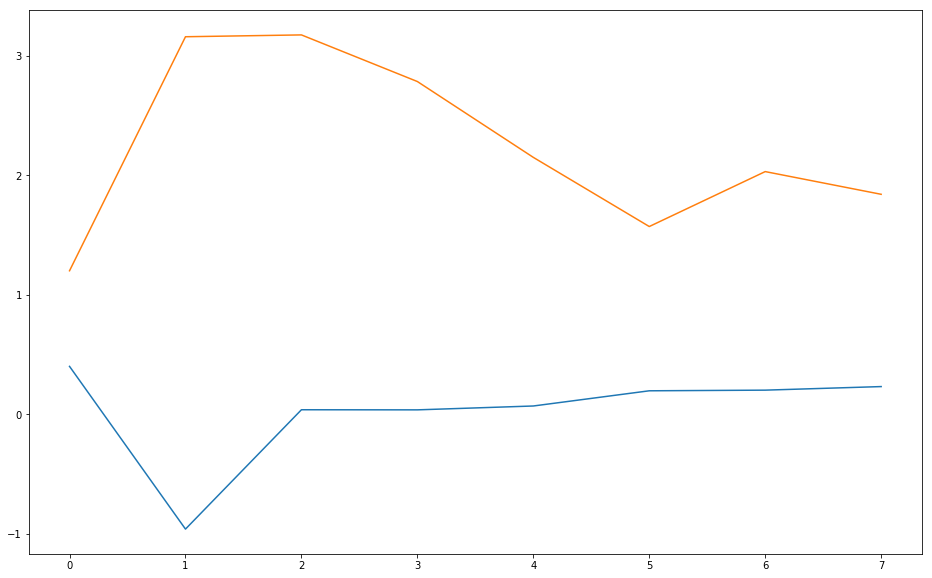

In [31]:
plt.plot(ans);

# (b)
By using logarithms to transform the equations, a fit to these data can also be done by linear least squares. Perform such a linear least squares fit to obtain estimates for $P_0$ and $r$, and compare your results with those for the nonlinear fit. Put the corresponding functions in a picture together with the data points and briefly discuss the results.

In [32]:
ans_log = gauss_newton(data, log_f, ti, x_init, max_iter, 1)

Gauss Newton sequence of iterations: 

+---+-------------------------+--------------------+
| k |           x.T           |         r2         |
+---+-------------------------+--------------------+
| 0 |        [0.4 1.2]        | 650.5192261946852  |
| 1 | [1.17389706 1.17606533] |  192.131393752176  |
| 2 | [1.67920367 1.67966975] | 59.27824307648161  |
| 3 | [1.81700882 1.81742014] | 49.20699189279554  |
| 4 | [1.88204483 1.88243626] | 46.96074179781135  |
| 5 | [1.91596218 1.91634433] | 46.35000646533727  |
| 6 | [1.93439908 1.93477646] | 46.169618958318715 |
| 7 | [1.94462666 1.94500147] | 46.11412444774741  |
+---+-------------------------+--------------------+


In [33]:
ans_log[:,0]

array([0.4       , 1.17389706, 1.67920367, 1.81700882, 1.88204483,
       1.91596218, 1.93439908, 1.94462666])

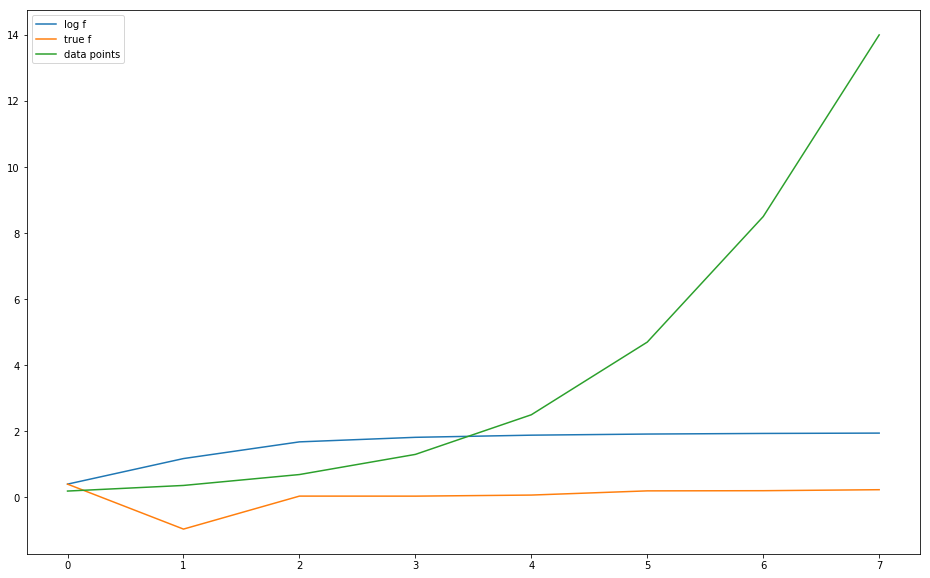

In [34]:
plt.plot(ans_log[:,0], label = "log f")
plt.plot(ans[:, 0], label = "true f")
plt.plot(ti, data, label = "data points")
plt.legend()
plt.show()

# this is wrong!

----------------------
# Exercise 3



Runge's function is given by

$$ f(t) = 1/(1+25t^2).$$

# (a)
Interpolate Runge's function on $[-1,1]$ by a polynomial $p_k$ of degree $k$ for $k = 5,10,15$. Use equally spaced interpolation points. Draw your interpolating polynomials together with $f$.

In [98]:
def runge_interpolate(degree, p):
    '''
    degree: k : [5, 10, 15]
    p: number of points (ex: 100)
    '''
    
    points = np.linspace(-1, 1, p+1)
    degree_pk_dict = {}
    
    for k in degree:
        degree_pk_dict['d'+str(k)] = np.linspace(-1, 1, k+1)
        degree_pk_dict['pk'+str(k)] = 1/(1+25*degree_pk_dict['d'+str(k)]**2)
        pk_fit = np.polyfit(degree_pk_dict['d'+str(k)], degree_pk_dict['pk'+str(k)], k)
        degree_pk_dict['ft_k'+str(k)] = np.polyval(pk_fit, points)
    
    ft_interpolate = 1/(1+25*points**2)
    
    return degree_pk_dict, points, ft_interpolate

def plot_interpolate(obj, title_, xlab):
    degree_pk_dict, points, ft_interpolate = obj

    plt.plot(points, ft_interpolate, label = "f(t)")
    plt.plot(degree_pk_dict['d5'], degree_pk_dict['pk5'], 'o', label = "{} equally spaced datapoints".format(len(degree_pk_dict['d5'])-1))

    plt.plot(points, degree_pk_dict['ft_k5'], '-.', label = "{}th degree polynomial".format(len(degree_pk_dict['d5'])-1))
    plt.plot(points, degree_pk_dict['ft_k10'], '--',  label = "{}th degree polynomial".format(len(degree_pk_dict['d10'])-1))
    plt.plot(points, degree_pk_dict['ft_k15'], ':', label = "{}th degree polynomial".format(len(degree_pk_dict['d15'])-1))
    
    plt.ylim(-0.3, 2.25)
    plt.title(title_, fontsize=14)
    plt.xlabel("Range [-1, 1]", fontsize=14)
    plt.ylabel(xlab, fontsize=14)
    plt.legend()
    plt.show()
    

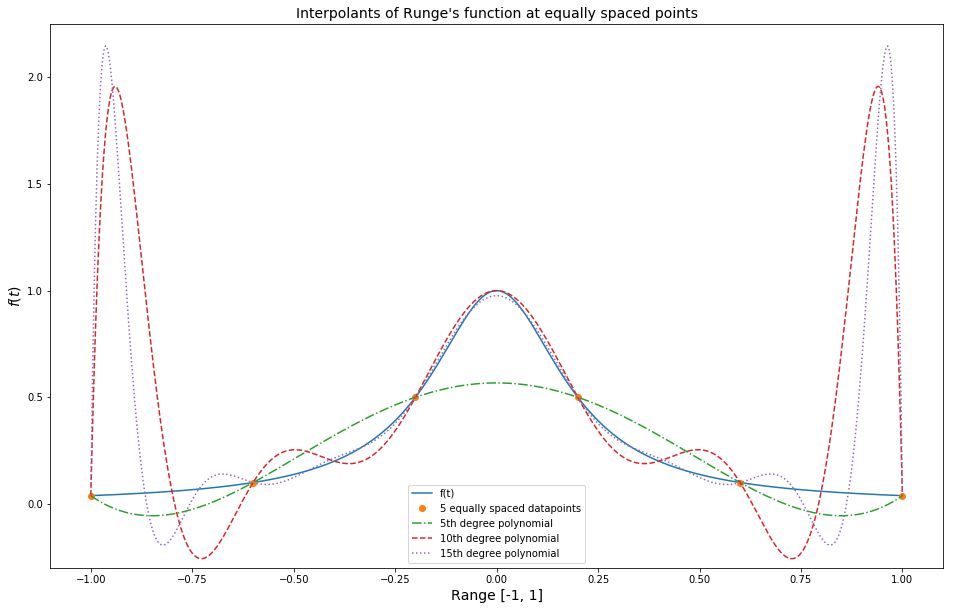

In [99]:
robj = runge_interpolate([5, 10, 15], 500)
plot_interpolate(robj, "Interpolants of Runge's function at equally spaced points", r'$f(t)$')

# (b)
Repeat (a) to find polynomials $q_k$. This time use the Chebyshev points as interpolation points. They are given by

$$t_i = \cos \left( \frac{(2i-1)\pi}{2k+2} \right),\, \,i = 1,\ldots,k+1.$$

In [100]:
def cheb_func(p):
    
    points = np.linspace(-1, 1, p+1)
    
    for i in range(len(points)):
        points[i] = np.cos( ((2*(i+1) -1)*np.pi)/(2*p + 2) )
    
    return points

In [101]:
def chebyshev_interpolate(degree, p):
    '''
    degree: k : [5, 10, 15]
    p: number of points (ex: 100)
    '''
    
    points = cheb_func(p)
    
    degree_pk_dict = {}
    
    for k in degree:
        degree_pk_dict['d'+str(k)] = cheb_func(k)
        degree_pk_dict['pk'+str(k)] = 1/(1+25*degree_pk_dict['d'+str(k)]**2)
        pk_fit = np.polyfit(degree_pk_dict['d'+str(k)], degree_pk_dict['pk'+str(k)], k)
        degree_pk_dict['ft_k'+str(k)] = np.polyval(pk_fit, points)
    
    ft_interpolate = 1/(1+25*points**2)
    
    return degree_pk_dict, points, ft_interpolate

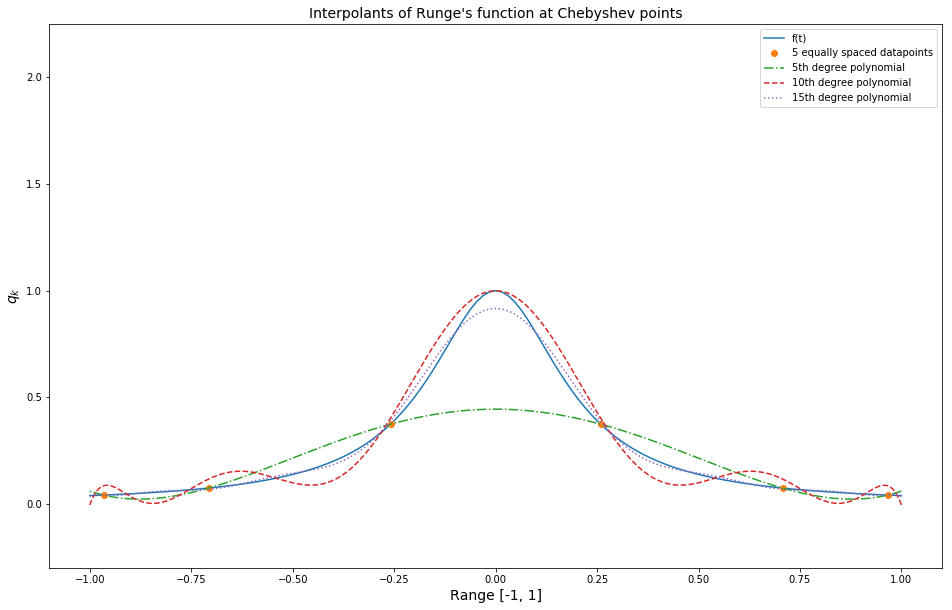

In [103]:
cobj = chebyshev_interpolate([5, 10, 15], 200)
plot_interpolate(cobj, "Interpolants of Runge's function at Chebyshev points", r'$q_k$')

# (c)
Verify numerically that the maximum of the difference of $f$ and $q_k$ in the interval $[-1,1]$ decreases with increasing $k$ by trying various values of $k$.